# International Football teams' success analysis

## Introduction

 This project aims to analyze the variables that most affect a country's national team performace in international football competitions.

## Data Entry, Packages Installation and EDA

In [531]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [532]:
df = pd.read_csv("fifa_ranking-2023-07-20.csv")

In [533]:
df.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,1,Germany,GER,57.0,0.0,0,UEFA,1992-12-31
1,96,Syria,SYR,11.0,0.0,0,AFC,1992-12-31
2,97,Burkina Faso,BFA,11.0,0.0,0,CAF,1992-12-31
3,99,Latvia,LVA,10.0,0.0,0,UEFA,1992-12-31
4,100,Burundi,BDI,10.0,0.0,0,CAF,1992-12-31


In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64757 entries, 0 to 64756
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             64757 non-null  int64  
 1   country_full     64757 non-null  object 
 2   country_abrv     64757 non-null  object 
 3   total_points     64757 non-null  float64
 4   previous_points  64757 non-null  float64
 5   rank_change      64757 non-null  int64  
 6   confederation    64757 non-null  object 
 7   rank_date        64757 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.0+ MB


In [535]:
df["rank_date"] = pd.to_datetime(df["rank_date"])

    Since a wide multivariate analysis will be performed, only results from 2022 will be used in the study.

In [536]:
df['year'] = pd.DatetimeIndex(df['rank_date']).year

In [537]:
df2022 = df[df["year"] == 2022]

In [538]:
df2022 = df2022.sort_values(by="rank")

In [539]:
df2022.head(15)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year
63989,1,Brazil,BRA,1840.77,1841.30,0,CONMEBOL,2022-12-22,2022
63070,1,Belgium,BEL,1828.45,1828.45,0,UEFA,2022-02-10,2022
63706,1,Brazil,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06,2022
63599,1,Brazil,BRA,1837.56,1837.56,0,CONMEBOL,2022-08-25,2022
63225,1,Brazil,BRA,1832.69,1823.42,-1,CONMEBOL,2022-03-31,2022
63493,1,Brazil,BRA,1837.56,1832.69,0,CONMEBOL,2022-06-23,2022
63495,2,Belgium,BEL,1821.92,1821.92,0,UEFA,2022-08-25,2022
63416,2,Belgium,BEL,1821.92,1827.00,0,UEFA,2022-06-23,2022
63988,2,Argentina,ARG,1838.38,1773.88,-1,CONMEBOL,2022-12-22,2022
63145,2,Belgium,BEL,1827.00,1828.45,1,UEFA,2022-03-31,2022


In [540]:
df2022['month'] = pd.DatetimeIndex(df2022['rank_date']).month

In [541]:
df2022 = df2022[df2022["month"] == 10]

In [542]:
df2022.head(15)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
63706,1,Brazil,BRA,1841.30,1837.56,0,CONMEBOL,2022-10-06,2022,10
63707,2,Belgium,BEL,1816.71,1821.92,0,UEFA,2022-10-06,2022,10
63705,3,Argentina,ARG,1773.88,1770.65,0,CONMEBOL,2022-10-06,2022,10
63708,4,France,FRA,1759.78,1764.85,0,UEFA,2022-10-06,2022,10
63777,5,England,ENG,1728.47,1737.46,0,UEFA,2022-10-06,2022,10
63710,6,Italy,ITA,1726.14,1713.86,-1,UEFA,2022-10-06,2022,10
63913,7,Spain,ESP,1715.22,1716.93,1,UEFA,2022-10-06,2022,10
63914,8,Netherlands,NED,1694.51,1679.41,0,UEFA,2022-10-06,2022,10
63915,9,Portugal,POR,1676.56,1678.65,0,UEFA,2022-10-06,2022,10
63709,10,Denmark,DEN,1666.57,1665.47,0,UEFA,2022-10-06,2022,10


## Population values for 2022 will be added into the dataframe.

In [543]:
populationdf = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_6011311.csv", sep=",", skiprows=3)
populationdf

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,106445.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0,702977106.0,720839314.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,41128771.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,490330870.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,35588987.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1761985.0,NaN
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,33696614.0,NaN
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,59893885.0,NaN
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,20017675.0,NaN


In [544]:
populationdf = populationdf.drop(columns=populationdf.columns[4:66])
populationdf = populationdf.drop(columns=populationdf.columns[-1:])
populationdf = populationdf.drop(columns=populationdf.columns[1:4])

In [545]:
populationdf=populationdf.rename(columns={"2022":"Population"})
df2022=df2022.rename(columns={"country_full":"Country Name"})

In [546]:
df1 = populationdf.merge(df2022, on="Country Name")
df1

,Country Name,Population,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month
0,Aruba,106445.0,201,ARU,855.37,855.37,-1,CONCACAF,2022-10-06,2022,10
1,Afghanistan,41128771.0,156,AFG,1023.04,1023.04,2,AFC,2022-10-06,2022,10
2,Angola,35588987.0,119,ANG,1155.90,1149.08,-1,CAF,2022-10-06,2022,10
3,Albania,2775634.0,66,ALB,1354.11,1361.81,0,UEFA,2022-10-06,2022,10
4,Andorra,79824.0,151,AND,1035.20,1028.70,-1,UEFA,2022-10-06,2022,10
...,...,...,...,...,...,...,...,...,...,...,...
168,Samoa,222382.0,191,SAM,894.26,894.26,0,OFC,2022-10-06,2022,10
169,Kosovo,1761985.0,107,KOS,1187.01,1183.90,1,UEFA,2022-10-06,2022,10
170,South Africa,59893885.0,67,RSA,1349.59,1350.55,-1,CAF,2022-10-06,2022,10
171,Zambia,20017675.0,88,ZAM,1267.41,1270.80,1,CAF,2022-10-06,2022,10


Now we have the population for 2022 for each country included in the original dataframe.

## We will add another variable containing GDP per capita (PPP) for 2022.

In [547]:
gdp = pd.read_excel("imfppp.xls")
gdp

,"GDP per capita, current prices (Purchasing power parity; international dollars per capita)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2543.142,2459.197,1990.994,no data,no data,no data,no data,no data,no data,no data
2,Albania,2155.361,2444.301,2614.754,2689.389,2783.011,2770.393,2927.299,2916.869,2921.8,...,14450.533,14171.034,16154.029,18164.426,19566.008,20739.093,21953.473,23230.392,24563.824,25985.292
3,Algeria,4807.98,5257.375,5754.706,6102.674,6469.218,6722.106,6663.644,6606.802,6514.928,...,11730.059,11167.288,11869.215,12900.41,13681.621,14227.928,14684.229,15059.542,15414.632,15786.678
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,58719.899,52513.662,58284.094,66154.531,68232.145,69042.392,69691.638,70295.127,70825.894,71377.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Latin America and the Caribbean,4724.492,5099.685,5274.383,5185.738,5467.857,5700.282,5913.458,6140.399,6297.009,...,16645.371,15500.029,17230.471,19046.397,20034.394,20784.378,21523.964,22294.352,23088.41,23907.997
223,Major advanced economies (G7),11111.009,12319.18,12990.359,13868.149,15001.522,15974.005,16696.742,17611.701,18967.924,...,55671.58,53598.124,58917.662,64246.953,67373.32,69590.544,72023.151,74545.033,77020.318,79545.367
224,Middle East and Central Asia,4856.274,5142.081,5179.862,5184.154,5175.039,5215.973,5191.672,5143.143,5339.791,...,12582.433,12141.177,12996.817,14901.648,15468.039,16064.223,16725.953,17354.432,18025.776,18707.828
225,Other advanced economies,6782.639,7627.071,8154.226,8689.364,9487.929,10110.621,10769.514,11615.247,12527.322,...,52881.126,52401.84,57906.311,63081.14,66043.027,68648.634,71354.453,74118.6,76837.164,79645.455


In [548]:
gdp = gdp.rename(columns={"GDP per capita, current prices (Purchasing power parity; international dollars per capita)": "Country Name"})
gdp

,Country Name,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2543.142,2459.197,1990.994,no data,no data,no data,no data,no data,no data,no data
2,Albania,2155.361,2444.301,2614.754,2689.389,2783.011,2770.393,2927.299,2916.869,2921.8,...,14450.533,14171.034,16154.029,18164.426,19566.008,20739.093,21953.473,23230.392,24563.824,25985.292
3,Algeria,4807.98,5257.375,5754.706,6102.674,6469.218,6722.106,6663.644,6606.802,6514.928,...,11730.059,11167.288,11869.215,12900.41,13681.621,14227.928,14684.229,15059.542,15414.632,15786.678
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,58719.899,52513.662,58284.094,66154.531,68232.145,69042.392,69691.638,70295.127,70825.894,71377.928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,Latin America and the Caribbean,4724.492,5099.685,5274.383,5185.738,5467.857,5700.282,5913.458,6140.399,6297.009,...,16645.371,15500.029,17230.471,19046.397,20034.394,20784.378,21523.964,22294.352,23088.41,23907.997
223,Major advanced economies (G7),11111.009,12319.18,12990.359,13868.149,15001.522,15974.005,16696.742,17611.701,18967.924,...,55671.58,53598.124,58917.662,64246.953,67373.32,69590.544,72023.151,74545.033,77020.318,79545.367
224,Middle East and Central Asia,4856.274,5142.081,5179.862,5184.154,5175.039,5215.973,5191.672,5143.143,5339.791,...,12582.433,12141.177,12996.817,14901.648,15468.039,16064.223,16725.953,17354.432,18025.776,18707.828
225,Other advanced economies,6782.639,7627.071,8154.226,8689.364,9487.929,10110.621,10769.514,11615.247,12527.322,...,52881.126,52401.84,57906.311,63081.14,66043.027,68648.634,71354.453,74118.6,76837.164,79645.455


In [549]:
gdp2022 = gdp[['Country Name', 2022]].copy()
gdp2022

,Country Name,2022
0,NaN,NaN
1,Afghanistan,no data
2,Albania,18164.426
3,Algeria,12900.41
4,Andorra,66154.531
...,...,...
222,Latin America and the Caribbean,19046.397
223,Major advanced economies (G7),64246.953
224,Middle East and Central Asia,14901.648
225,Other advanced economies,63081.14


In [550]:
gdp2022 = gdp2022.rename(columns={2022: "GDP per capita (PPP)"})
gdp2022

,Country Name,GDP per capita (PPP)
0,NaN,NaN
1,Afghanistan,no data
2,Albania,18164.426
3,Algeria,12900.41
4,Andorra,66154.531
...,...,...
222,Latin America and the Caribbean,19046.397
223,Major advanced economies (G7),64246.953
224,Middle East and Central Asia,14901.648
225,Other advanced economies,63081.14


Now we join GDP per capita table with df1

In [551]:
df2 = df1.merge(gdp2022, on="Country Name")
df2


,Country Name,Population,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month,GDP per capita (PPP)
0,Aruba,106445.0,201,ARU,855.37,855.37,-1,CONCACAF,2022-10-06,2022,10,48340.816
1,Afghanistan,41128771.0,156,AFG,1023.04,1023.04,2,AFC,2022-10-06,2022,10,no data
2,Angola,35588987.0,119,ANG,1155.90,1149.08,-1,CAF,2022-10-06,2022,10,6943.912
3,Albania,2775634.0,66,ALB,1354.11,1361.81,0,UEFA,2022-10-06,2022,10,18164.426
4,Andorra,79824.0,151,AND,1035.20,1028.70,-1,UEFA,2022-10-06,2022,10,66154.531
...,...,...,...,...,...,...,...,...,...,...,...,...
154,Samoa,222382.0,191,SAM,894.26,894.26,0,OFC,2022-10-06,2022,10,5883.185
155,Kosovo,1761985.0,107,KOS,1187.01,1183.90,1,UEFA,2022-10-06,2022,10,14657.87
156,South Africa,59893885.0,67,RSA,1349.59,1350.55,-1,CAF,2022-10-06,2022,10,15728.48
157,Zambia,20017675.0,88,ZAM,1267.41,1270.80,1,CAF,2022-10-06,2022,10,3893.978


Checking for null values...

In [552]:
df2["GDP per capita (PPP)"].str.contains('no data').value_counts()
df2.iloc[df2[df2["GDP per capita (PPP)"]=='no data'].index]

,Country Name,Population,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month,GDP per capita (PPP)
1,Afghanistan,41128771.0,156,AFG,1023.04,1023.04,2,AFC,2022-10-06,2022,10,no data
45,Eritrea,3684032.0,200,ERI,855.56,855.56,-1,CAF,2022-10-06,2022,10,no data


In [553]:
df2 = df2.drop(df2[df2['GDP per capita (PPP)'] == 'no data'].index)


Now we can proceed to annex another column.

## The following column annexed will be about corruption index for all of the countries.

In [554]:
corruptiondf = pd.read_excel("Corruption perception index 2022.xlsx", skiprows=2)
corruptiondf

,Country / Territory,ISO3,Region,CPI score 2022,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Afghanistan,AFG,AP,24,150,6.299999,4,13.66800,34.33200,NaN,...,NaN,NaN,10,NaN,NaN,NaN,43.0,NaN,NaN,16.0
1,Albania,ALB,ECA,36,101,1.316355,8,33.84118,38.15882,NaN,...,37.0,42.0,35,NaN,NaN,32.0,27.0,NaN,42.0,29.0
2,Algeria,DZA,MENA,33,116,1.673809,6,30.25495,35.74504,NaN,...,37.0,NaN,35,NaN,NaN,24.0,29.0,NaN,NaN,36.0
3,Angola,AGO,SSA,33,116,2.807703,7,28.39537,37.60463,NaN,...,20.0,NaN,47,NaN,NaN,32.0,46.0,NaN,22.0,28.0
4,Argentina,ARG,AME,38,94,2.334808,7,34.17091,41.82909,NaN,...,37.0,NaN,35,24.0,NaN,32.0,47.0,NaN,NaN,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Venezuela,VEN,AME,14,177,1.296945,8,11.87301,16.12699,NaN,...,20.0,NaN,10,24.0,NaN,15.0,9.0,NaN,13.0,9.0
176,Vietnam,VNM,AP,42,77,1.497007,8,39.54491,44.45509,NaN,...,37.0,NaN,47,NaN,39.0,41.0,44.0,NaN,55.0,36.0
177,Yemen,YEM,MENA,16,176,1.975074,7,12.76088,19.23912,NaN,...,20.0,NaN,10,NaN,NaN,15.0,11.0,10.0,30.0,NaN
178,Zambia,ZMB,SSA,33,116,1.495884,9,30.54675,35.45325,34.0,...,37.0,NaN,35,NaN,NaN,32.0,49.0,27.0,30.0,36.0


In [555]:
corruptiondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country / Territory                                  180 non-null    object 
 1   ISO3                                                 180 non-null    object 
 2   Region                                               180 non-null    object 
 3   CPI score 2022                                       180 non-null    int64  
 4   Rank                                                 180 non-null    int64  
 5   Standard error                                       180 non-null    float64
 6   Number of sources                                    180 non-null    int64  
 7   Lower CI                                             180 non-null    float64
 8   Upper CI                                             180 non-null    f

In [556]:
corruption = corruptiondf[["Country / Territory", "CPI score 2022"]].copy()
corruption = corruption.rename(columns={"Country / Territory": "Country Name"})
corruption

,Country Name,CPI score 2022
0,Afghanistan,24
1,Albania,36
2,Algeria,33
3,Angola,33
4,Argentina,38
...,...,...
175,Venezuela,14
176,Vietnam,42
177,Yemen,16
178,Zambia,33


In [557]:
df3 = corruption.merge(df2, on="Country Name")
df3

,Country Name,CPI score 2022,Population,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month,GDP per capita (PPP)
0,Albania,36,2775634.0,66,ALB,1354.11,1361.81,0,UEFA,2022-10-06,2022,10,18164.426
1,Algeria,33,44903225.0,37,ALG,1489.10,1480.59,-4,CAF,2022-10-06,2022,10,12900.41
2,Angola,33,35588987.0,119,ANG,1155.90,1149.08,-1,CAF,2022-10-06,2022,10,6943.912
3,Argentina,38,46234830.0,3,ARG,1773.88,1770.65,0,CONMEBOL,2022-10-06,2022,10,26483.657
4,Armenia,46,2780469.0,93,ARM,1233.93,1242.42,1,UEFA,2022-10-06,2022,10,17794.633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,Uruguay,74,3422794.0,14,URU,1638.71,1640.95,1,CONMEBOL,2022-10-06,2022,10,27769.764
142,Uzbekistan,31,35648100.0,77,UZB,1309.98,1306.63,0,AFC,2022-10-06,2022,10,9634.227
143,Vanuatu,48,326740.0,164,VAN,985.62,990.55,0,OFC,2022-10-06,2022,10,2889.889
144,Zambia,33,20017675.0,88,ZAM,1267.41,1270.80,1,CAF,2022-10-06,2022,10,3893.978


Now we have the Corruption Perception Index for 2022.

## In order to take into account physical characteristics, we will add average male height per country.

In [558]:
height = pd.read_csv("Average Height by country in 2022.csv")
height

,Country,Population,Average Height Male (cm),Average Height Female (cm),Average Height Male (m),Average Height Female (m),Average Height Male (in),Average Height Female (in),Average Height Male (ft),Average Height Female (ft)
0,Netherlands,"17,134,872",183.78,170.36,1.84,1.70,72.36,67.07,6.03,5.59
1,Montenegro,"628,066",183.30,169.96,1.83,1.70,72.17,66.91,6.01,5.58
2,Estonia,"1,326,535",182.79,168.66,1.83,1.69,71.96,66.40,6.00,5.53
3,Bosnia and Herzegovina,"3,280,819",182.47,167.47,1.82,1.67,71.84,65.93,5.99,5.49
4,Iceland,"341,243",182.10,168.91,1.82,1.69,71.69,66.50,5.97,5.54
...,...,...,...,...,...,...,...,...,...,...
194,Mozambique,"31,255,435",164.30,155.42,1.64,1.55,64.68,61.19,5.39,5.10
195,Papua New Guinea,"8,947,024",163.10,156.89,1.63,1.57,64.21,61.77,5.35,5.15
196,Solomon Islands,"686,884",163.07,156.79,1.63,1.57,64.20,61.73,5.35,5.14
197,Laos,"7,275,560",162.78,153.10,1.63,1.53,64.09,60.28,5.34,5.02


In [559]:
heightdf = height[['Country', 'Average Height Male (cm)']]
heightdf = heightdf.rename(columns={'Country':'Country Name'})
heightdf

,Country Name,Average Height Male (cm)
0,Netherlands,183.78
1,Montenegro,183.30
2,Estonia,182.79
3,Bosnia and Herzegovina,182.47
4,Iceland,182.10
...,...,...
194,Mozambique,164.30
195,Papua New Guinea,163.10
196,Solomon Islands,163.07
197,Laos,162.78


In [560]:
df4 = heightdf.merge(df3, on='Country Name')
df4

,Country Name,Average Height Male (cm),CPI score 2022,Population,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month,GDP per capita (PPP)
0,Netherlands,183.78,80,17703090.0,8,NED,1694.51,1679.41,0,UEFA,2022-10-06,2022,10,70727.703
1,Montenegro,183.30,45,616159.0,69,MNE,1341.03,1354.59,2,UEFA,2022-10-06,2022,10,25862.371
2,Estonia,182.79,74,1344768.0,109,EST,1184.64,1177.40,-1,UEFA,2022-10-06,2022,10,44630.071
3,Bosnia and Herzegovina,182.47,34,3233526.0,58,BIH,1403.51,1403.98,1,UEFA,2022-10-06,2022,10,18517.875
4,Iceland,182.10,74,381900.0,62,ISL,1384.41,1379.61,-1,UEFA,2022-10-06,2022,10,67175.734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Guatemala,164.36,24,17357886.0,118,GUA,1156.70,1161.96,0,CONCACAF,2022-10-06,2022,10,10075.54
140,Mozambique,164.30,26,32969518.0,114,MOZ,1165.22,1165.41,-2,CAF,2022-10-06,2022,10,1468.794
141,Papua New Guinea,163.10,30,10142619.0,159,PNG,1007.46,997.60,-2,OFC,2022-10-06,2022,10,3251.847
142,Solomon Islands,163.07,42,724273.0,136,SOL,1095.70,1092.56,-1,OFC,2022-10-06,2022,10,2324.917


## Finally, we are going to introduce a dataset that contains the most popular sport per country.

In [561]:
popularsport = pd.read_csv("CountriesPopularSports.csv", delimiter=";")
popularsport

,Country,Sport
0,Afghanistan,Cricket
1,Albania,Soccer
2,Algeria,Soccer
3,American Samoa,Soccer
4,Andorra,Soccer
...,...,...
195,Vietnam,Soccer
196,Wallis and Futuna,Rugby
197,Yemen,Soccer
198,Zambia,Soccer


In [562]:
target_sport = 'Soccer'
popularsport['IsFootball'] = (popularsport['Sport'] == target_sport).astype(int)
popularsport = popularsport.rename(columns={'Country': 'Country Name'})
popularsport


,Country Name,Sport,IsFootball
0,Afghanistan,Cricket,0
1,Albania,Soccer,1
2,Algeria,Soccer,1
3,American Samoa,Soccer,1
4,Andorra,Soccer,1
...,...,...,...
195,Vietnam,Soccer,1
196,Wallis and Futuna,Rugby,0
197,Yemen,Soccer,1
198,Zambia,Soccer,1


In [563]:
fdf = popularsport.merge(df4, on='Country Name')
fdf

,Country Name,Sport,IsFootball,Average Height Male (cm),CPI score 2022,Population,rank,country_abrv,total_points,previous_points,rank_change,confederation,rank_date,year,month,GDP per capita (PPP)
0,Albania,Soccer,1,174.07,36,2775634.0,66,ALB,1354.11,1361.81,0,UEFA,2022-10-06,2022,10,18164.426
1,Algeria,Soccer,1,175.04,33,44903225.0,37,ALG,1489.10,1480.59,-4,CAF,2022-10-06,2022,10,12900.41
2,Angola,Soccer,1,168.46,33,35588987.0,119,ANG,1155.90,1149.08,-1,CAF,2022-10-06,2022,10,6943.912
3,Argentina,Soccer,1,174.76,38,46234830.0,3,ARG,1773.88,1770.65,0,CONMEBOL,2022-10-06,2022,10,26483.657
4,Armenia,Soccer,1,173.67,46,2780469.0,93,ARM,1233.93,1242.42,1,UEFA,2022-10-06,2022,10,17794.633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Uruguay,Soccer,1,174.32,74,3422794.0,14,URU,1638.71,1640.95,1,CONMEBOL,2022-10-06,2022,10,27769.764
138,Uzbekistan,Soccer,1,170.94,31,35648100.0,77,UZB,1309.98,1306.63,0,AFC,2022-10-06,2022,10,9634.227
139,Vanuatu,Soccer,1,168.29,48,326740.0,164,VAN,985.62,990.55,0,OFC,2022-10-06,2022,10,2889.889
140,Zambia,Soccer,1,167.62,33,20017675.0,88,ZAM,1267.41,1270.80,1,CAF,2022-10-06,2022,10,3893.978


Now, we will just eliminate variables that we do not need.

In [564]:
columns_to_drop = ['country_abrv', 'total_points', 'previous_points', 'rank_change', 'year', 'month']
dff = fdf.drop(columns=columns_to_drop)

# EDA

In [565]:
dff.sort_values(by='rank')

,Country Name,Sport,IsFootball,Average Height Male (cm),CPI score 2022,Population,rank,confederation,rank_date,GDP per capita (PPP)
17,Brazil,Soccer,1,175.73,38,215313498.0,1,CONMEBOL,2022-10-06,18896.72
12,Belgium,Soccer,1,179.09,73,11669446.0,2,UEFA,2022-10-06,63268.131
3,Argentina,Soccer,1,174.76,38,46234830.0,3,CONMEBOL,2022-10-06,26483.657
43,France,Soccer,1,178.60,72,67935660.0,4,UEFA,2022-10-06,56304.971
61,Italy,Soccer,1,174.42,56,58856847.0,6,UEFA,2022-10-06,51826.692
...,...,...,...,...,...,...,...,...,...,...
99,Pakistan,Cricket,0,167.33,27,235824862.0,194,AFC,2022-10-06,6695.334
129,Timor-Leste,Soccer,1,160.13,42,1341296.0,198,AFC,2022-10-06,7064.401
113,Seychelles,Soccer,1,175.90,70,100060.0,199,CAF,2022-10-06,39078.626
118,Somalia,Soccer,1,171.22,12,17597511.0,203,CAF,2022-10-06,1927.587


In [566]:
dff['GDP per capita (PPP)'] = dff['GDP per capita (PPP)'].astype(float)

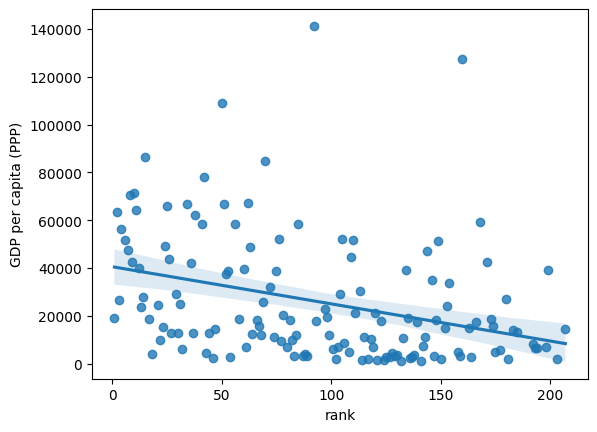

In [567]:
sns.regplot(x='rank', y='GDP per capita (PPP)', data=dff)
plt.show() 


Although a slight correlation appears to be the case, it is very slim.


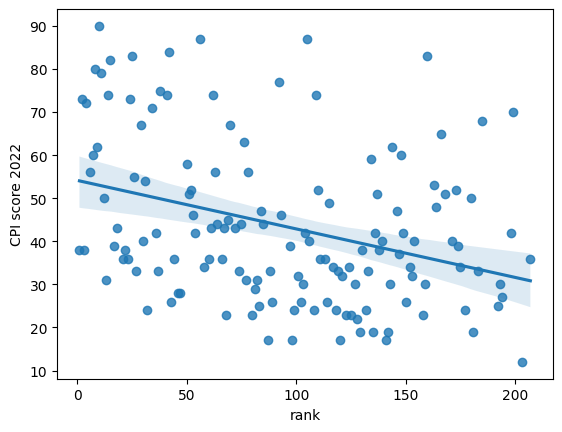

In [568]:
sns.regplot(x='rank', y='CPI score 2022', data=dff)
plt.show() 

Appears to be no correlation.

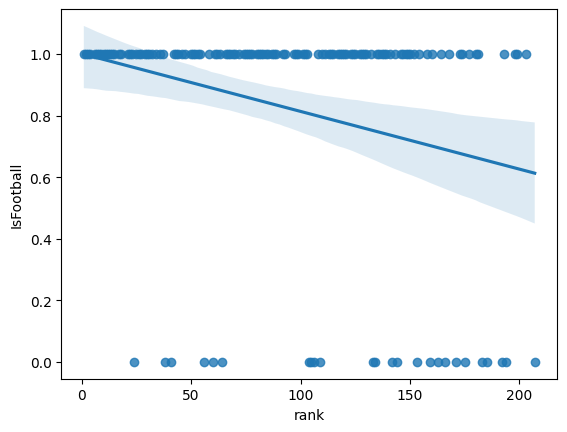

In [569]:
sns.regplot(x='rank', y='IsFootball', data=dff)
plt.show() 

In [570]:
dff.sort_values(by='rank').head(20)


,Country Name,Sport,IsFootball,Average Height Male (cm),CPI score 2022,Population,rank,confederation,rank_date,GDP per capita (PPP)
17,Brazil,Soccer,1,175.73,38,215313498.0,1,CONMEBOL,2022-10-06,18896.720
12,Belgium,Soccer,1,179.09,73,11669446.0,2,UEFA,2022-10-06,63268.131
3,Argentina,Soccer,1,174.76,38,46234830.0,3,CONMEBOL,2022-10-06,26483.657
43,France,Soccer,1,178.60,72,67935660.0,4,UEFA,2022-10-06,56304.971
61,Italy,Soccer,1,174.42,56,58856847.0,6,UEFA,2022-10-06,51826.692
120,Spain,Soccer,1,176.11,60,47615034.0,7,UEFA,2022-10-06,47710.697
92,Netherlands,Soccer,1,183.78,80,17703090.0,8,UEFA,2022-10-06,70727.703
106,Portugal,Soccer,1,174.37,62,10379007.0,9,UEFA,2022-10-06,42692.124
32,Denmark,Soccer,1,181.89,90,5903037.0,10,UEFA,2022-10-06,71331.992
46,Germany,Soccer,1,180.28,79,84079811.0,11,UEFA,2022-10-06,64086.097


Out of the top 20 teams in the ranking, we can see that all countries' most popular sport is football.

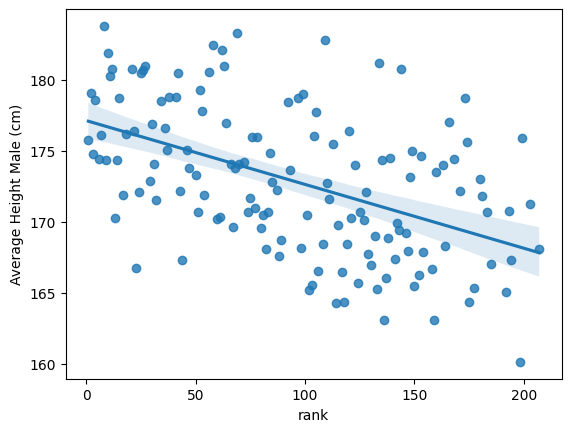

In [571]:
sns.regplot(x='rank', y='Average Height Male (cm)', data=dff)
plt.show() 

When plotting rank and height, there appears to be a correlation.

float64


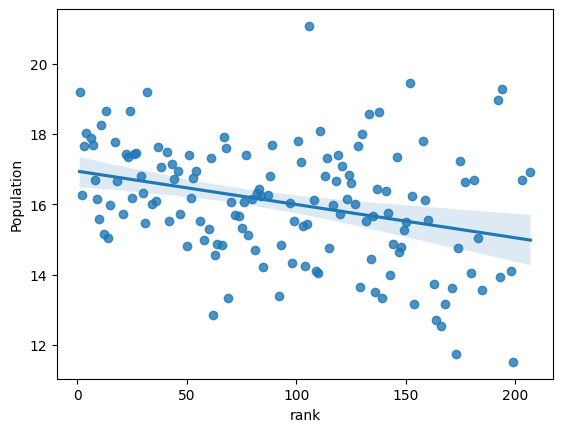

In [572]:
import numpy as np

dff['Population'] = pd.to_numeric(dff['Population'], errors='coerce')

dff = dff[dff['Population'].notna() & (dff['Population'] > 0)]

print(dff['Population'].dtype)

sns.regplot(x='rank', y=np.log1p(dff['Population']), data=dff)
plt.show()

In terms of population and ranking, there also seems to be a slight correlation.

/var/folders/2c/swd45dx96wx6grsplskbmfvh0000gn/T/ipykernel_18338/776485885.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='confederation', y='rank', data=dff, ci=None)


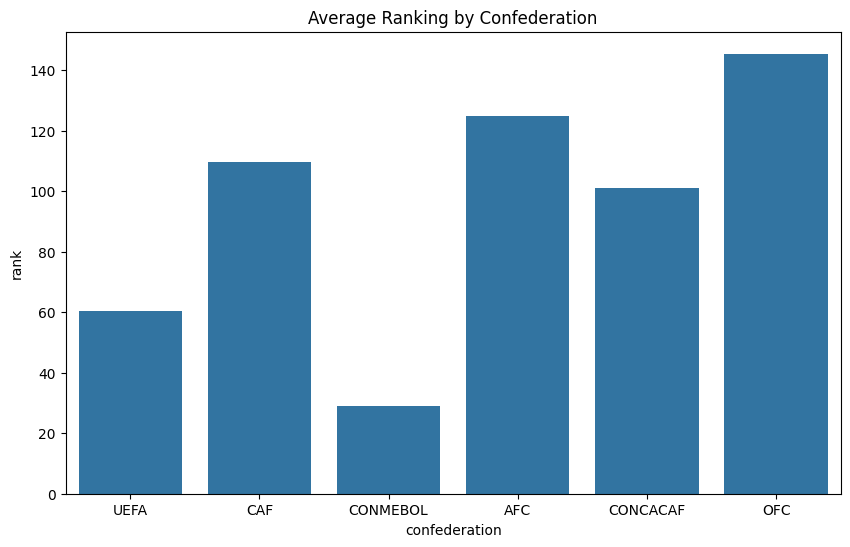

In [573]:
plt.figure(figsize=(10, 6))
sns.barplot(x='confederation', y='rank', data=dff, ci=None)
plt.title('Average Ranking by Confederation')
plt.show()

As we can see, there is a strong relationship between the confederations and the rank. Conmebol appears to have the highest average ranking.


### Now let us plot a correlation matrix to discover the relationships between variables.

In [590]:
numeric_columns = dff.select_dtypes(include=[np.number]).columns
numeric_df = dff[numeric_columns]

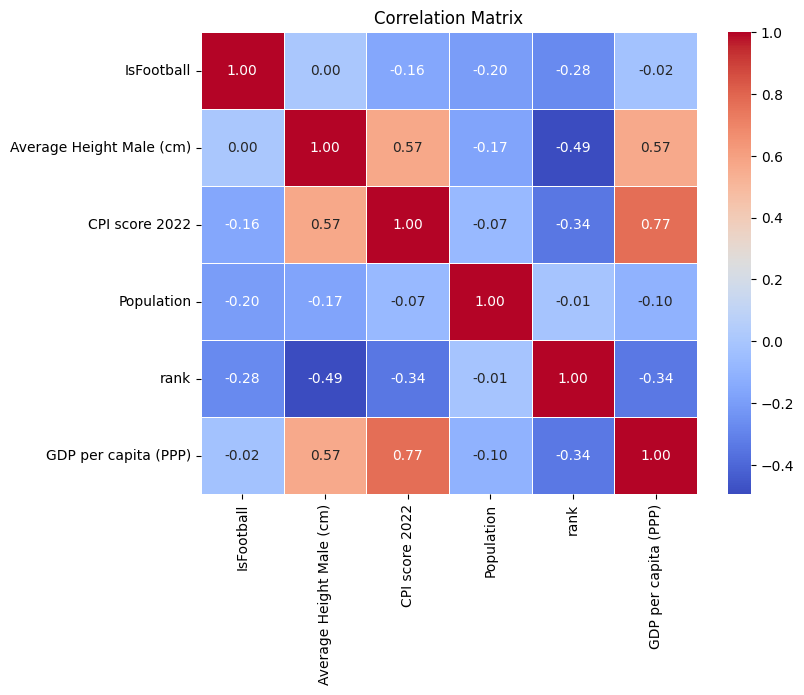

In [591]:
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Since a lower ranking means a better one, we are looking for negative correlations. Thus, it is clear that Average Height, CPI score, and GDP per capita (PPP) show significant scores. If the country's most popular sport is foootball also has a negative correlation. 

# Regression Analysis



In the quest to understand the factors influencing football rankings, we turn to the powerful tool of supervised machine learning. Specifically, linear regression will be implemented, a fundamental and widely-used algorithm that helps predict continuous outcomes based on linear relationships between independent variables.

Imagine each country vying for football glory as a data point, represented by various features like average height, economic indicators, and football popularity. Linear regression aims to find the best-fitting straight line through these data points, where the equation of this line tells us how much the predicted ranking (outcome) changes for each unit increase in a specific feature (predictor).

Here's what makes linear regression particularly advantageous for our project:

- Interpretability: We can readily understand the direction and magnitude of the relationship between each feature and ranking.
- Simplicity: Its underlying math is relatively straightforward, making it a great starting point for exploring machine learning concepts.
- Efficiency: It's computationally efficient and robust, making it suitable for large datasets like ours.
- Flexibility: It can be easily extended to include additional features and interactions between them.

However, it's essential to acknowledge that linear regression has limitations:

- Linear Assumption: It assumes a linear relationship between features and the outcome, which might not always hold true in complex systems like football performance.
- Outliers: Outliers in the data can significantly influence the model's fit and accuracy.
- Correlation vs. Causation: While it reveals associations, it doesn't establish causality, meaning we can't claim that changing one feature directly leads to a change in ranking.

Despite these limitations, linear regression provides a valuable first step in exploring the key factors influencing football rankings. By analyzing the coefficients and model fit, we can gain valuable insights and pave the way for further exploration with more sophisticated modeling techniques.

## Multiple linear regression


In [576]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [577]:
dff

,Country Name,Sport,IsFootball,Average Height Male (cm),CPI score 2022,Population,rank,confederation,rank_date,GDP per capita (PPP)
0,Albania,Soccer,1,174.07,36,2775634.0,66,UEFA,2022-10-06,18164.426
1,Algeria,Soccer,1,175.04,33,44903225.0,37,CAF,2022-10-06,12900.410
2,Angola,Soccer,1,168.46,33,35588987.0,119,CAF,2022-10-06,6943.912
3,Argentina,Soccer,1,174.76,38,46234830.0,3,CONMEBOL,2022-10-06,26483.657
4,Armenia,Soccer,1,173.67,46,2780469.0,93,UEFA,2022-10-06,17794.633
...,...,...,...,...,...,...,...,...,...,...
137,Uruguay,Soccer,1,174.32,74,3422794.0,14,CONMEBOL,2022-10-06,27769.764
138,Uzbekistan,Soccer,1,170.94,31,35648100.0,77,AFC,2022-10-06,9634.227
139,Vanuatu,Soccer,1,168.29,48,326740.0,164,OFC,2022-10-06,2889.889
140,Zambia,Soccer,1,167.62,33,20017675.0,88,CAF,2022-10-06,3893.978


Because 'confederation' is a categorical variable, we first need to encode it in order to get it in the linear model. For this purpose, in the next cell dummies are created.

In [578]:
dff = pd.get_dummies(dff, columns=['confederation'], drop_first=True)

In [579]:
dff

,Country Name,Sport,IsFootball,Average Height Male (cm),CPI score 2022,Population,rank,rank_date,GDP per capita (PPP),confederation_CAF,confederation_CONCACAF,confederation_CONMEBOL,confederation_OFC,confederation_UEFA
0,Albania,Soccer,1,174.07,36,2775634.0,66,2022-10-06,18164.426,False,False,False,False,True
1,Algeria,Soccer,1,175.04,33,44903225.0,37,2022-10-06,12900.410,True,False,False,False,False
2,Angola,Soccer,1,168.46,33,35588987.0,119,2022-10-06,6943.912,True,False,False,False,False
3,Argentina,Soccer,1,174.76,38,46234830.0,3,2022-10-06,26483.657,False,False,True,False,False
4,Armenia,Soccer,1,173.67,46,2780469.0,93,2022-10-06,17794.633,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,Uruguay,Soccer,1,174.32,74,3422794.0,14,2022-10-06,27769.764,False,False,True,False,False
138,Uzbekistan,Soccer,1,170.94,31,35648100.0,77,2022-10-06,9634.227,False,False,False,False,False
139,Vanuatu,Soccer,1,168.29,48,326740.0,164,2022-10-06,2889.889,False,False,False,True,False
140,Zambia,Soccer,1,167.62,33,20017675.0,88,2022-10-06,3893.978,True,False,False,False,False


In [581]:
X = dff[['IsFootball', 'Average Height Male (cm)', 'CPI score 2022', 'Population', 'confederation_CAF', 'confederation_CONCACAF', 'confederation_CONMEBOL', 'confederation_OFC', 'confederation_UEFA' ,'GDP per capita (PPP)']]
y = dff['rank']

In [582]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

In [583]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [584]:
y_pred = model.predict(X_train)

In [585]:
coefficients = model.coef_
intercept = model.intercept_

print(f'Intercept: {intercept}')
for feature, coefficient in zip(X.columns, coefficients):
    print(f'{feature}: {coefficient}')

Intercept: 822.5210264015872
IsFootball: -38.367039331906334
Average Height Male (cm): -3.801485833933452
CPI score 2022: -0.2979946836496773
Population: -6.877433701169826e-08
confederation_CAF: -11.54605724136743
confederation_CONCACAF: -23.90300623705158
confederation_CONMEBOL: -80.07914103901773
confederation_OFC: 2.5222546986521497
confederation_UEFA: -15.394245486555002
GDP per capita (PPP): -0.0003410846056636895


In [586]:
r_squared = model.score(X_train, y_train)
print("R-squared:", r_squared)

R-squared: 0.45969479412006775


The r-squared in the model threw a .46 score. This is not a very high accuracy model, but considering the target variable is one of very complex relationships, it does provide a framework in decision making architecture.

/var/folders/2c/swd45dx96wx6grsplskbmfvh0000gn/T/ipykernel_18338/2577668275.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')  # Choose a colormap


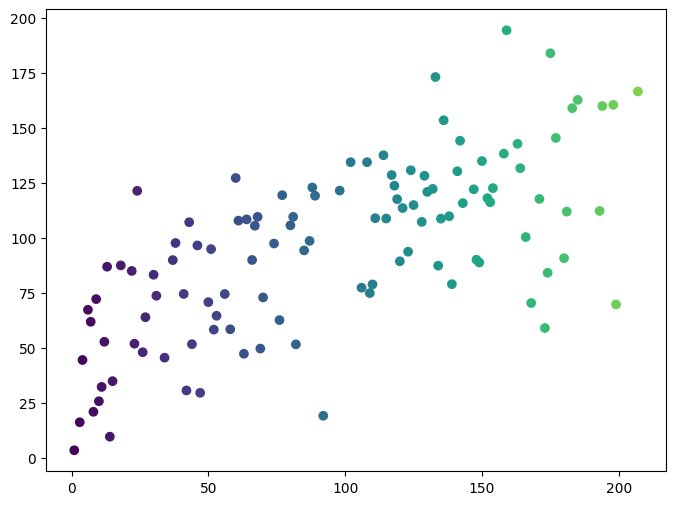

In [587]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.figure(figsize=(8, 6))
colors = ['blue' if i == j else 'red' for i, j in zip(y_train, y_pred)]  
cmap = cm.get_cmap('viridis')  # Choose a colormap
colors = cmap(y_train)  # Generate colors based on y_train values
plt.scatter(y_train, y_pred, c=colors)


# Conclusions

## Research Question: This project aimed to identify the factors that significantly influence a country's football ranking.

## Key Findings:

- CONMEBOL Confederation: Countries in this confederation tend to have the highest average ranking, even when controlling for other factors.
- UEFA Confederation: countries in this confederation occupy the highest rankings, but countries in the Eastern region tend to be on lower ends of the ranking.
- IsFootball: Countries where football is the most popular sport also tend to achieve higher rankings.
- Average Height Male: A taller average male height is associated with better rankings, suggesting a potential advantage. Actually, there is a correlation of .49 between a higher ranking and average male height.
- CPI Score 2022: Higher corruption perception index scores correlate with lower rankings, indicating the potential damages of corruption.
- Other Confederations (CAF, CONCACAF): Countries in these confederations also tend to have better rankings than those in AFC, though the effects are less pronounced.
- Population and GDP per capita (PPP): Not so evidently, population has a minimal correlation with ranking. However, GDP per capita has a correlation of .34, which displays a potential possibility of the infrastructure development more advanced economies can inflict on the football industry.
- Model Fit: The model's R-squared value of 0.4597 suggests that it explains about 46% of the variation in football rankings using the included variables. While not exceptionally high, it indicates a moderate ability to capture the factors influencing rankings.

## Practical Implications:

- Football organizations could prioritize strategies within the most influential factors, such as:
- Addressing corruption, which is where one of the most significant problem lies.
- Fostering football's popularity as the primary sport.


Conclusion:

This project has identified several factors that appear to influence national football rankings, with confederation membership, football popularity, average male height, corruption perception, GDP per capita in purchasing power parity terms, and, to a lesser extent, population playing notable roles. However, the model's limitations given the intricate dynamics surrounding the reality of national football development are significant and have to be taken into account when making important assumptions.